# Interact with Jupyter in `serc` just like a local machine

In this demo, we'll show you how Jupyter Lab can be used in an Open On Demand session within `serc` similarly to how you might use the Jupyter ecosystem on your local machine.

We can import Python libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now we'll simulate a year of data from a fictional weather monitoring station.

In [2]:
np.random.seed(42)
n = 365

In [3]:
# Simulate regions
regions = np.random.choice(['Coastal', 'Inland', 'Mountain'], size=n)

# Temperature (°C)
temperature = np.random.normal(loc=15, scale=5, size=n)
temperature += (regions == 'Coastal') * 2
temperature += (regions == 'Mountain') * -5

# Precipitation (mm)
precipitation = np.random.exponential(scale=3, size=n)
precipitation += (regions == 'Mountain') * 1.5

# Wind Speed (km/h)
wind_speed = np.random.normal(loc=10, scale=2, size=n)
wind_speed += (regions == 'Coastal') * 3

We'll put our data in a dataframe.

In [4]:
df = pd.DataFrame({
    'Region': regions,
    'Temperature_C': temperature,
    'Precipitation_mm': precipitation,
    'WindSpeed_kmh': wind_speed,
    'DayOfYear': np.arange(1, n + 1)
})

Which we can visualize in the notebook:

In [5]:
df.head(5)

,Region,Temperature_C,Precipitation_mm,WindSpeed_kmh,DayOfYear
0,Mountain,5.580713,2.833384,14.150802,1
1,Coastal,17.768626,6.291608,12.008062,2
2,Mountain,10.291044,2.994938,9.663770,3
3,Mountain,4.285149,6.588248,9.253201,4
4,Coastal,18.788937,1.734825,10.652860,5


`pandas` also allows us to look at the summary stats before we save anything.

In [6]:
summary = df.describe()
print("Summary statistics:\n")
print(summary)

Summary statistics:

       Temperature_C  Precipitation_mm  WindSpeed_kmh   DayOfYear
count     365.000000        365.000000     365.000000  365.000000
mean       13.915750          3.484146      11.112359  183.000000
std         5.718611          3.006421       2.319492  105.510663
min        -1.206337          0.013928       3.038382    1.000000
25%        10.086001          1.343430       9.586866   92.000000
50%        14.053176          2.714458      11.061601  183.000000
75%        17.852993          4.808630      12.647750  274.000000
max        29.263657         18.804245      18.930021  365.000000


Or to probe a specific stat, like mean temperature by region.

In [7]:
mean_temp_by_region = df.groupby('Region')['Temperature_C'].mean()
print("\nMean Temperature by Region:")
print(mean_temp_by_region)


Mean Temperature by Region:
Region
Coastal     16.598448
Inland      15.305114
Mountain    10.028910
Name: Temperature_C, dtype: float64


We can take a closer look at this distribution by visualizing the temperature distribution by region.

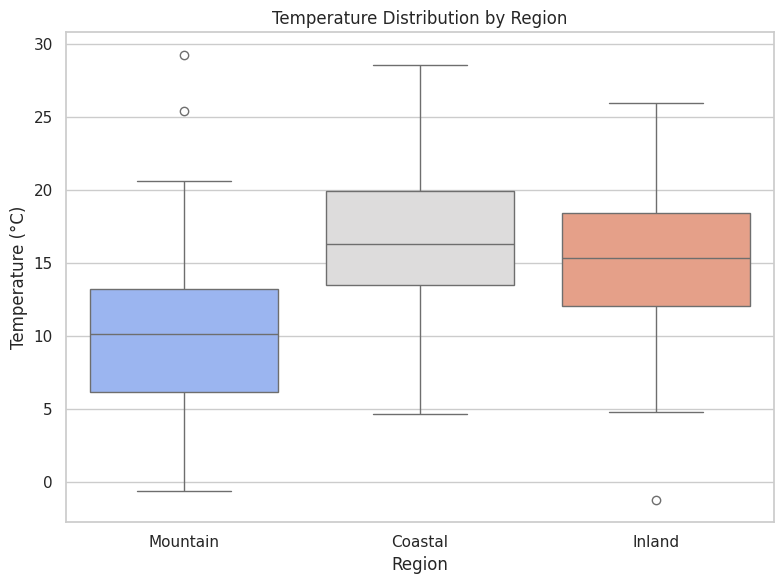

In [9]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='Temperature_C', data=df, 
            hue='Region', palette='coolwarm', legend=False)
plt.title('Temperature Distribution by Region')
plt.ylabel('Temperature (°C)')
plt.tight_layout()

Finally we can save the temperature distribution figure and a csv of the summary statistics directly to Oak from our interactive session.

In [13]:
plt.savefig('../figs/temperature_dists.png')

<Figure size 640x480 with 0 Axes>

In [12]:
summary.to_csv('../data/weather_stats.csv')